In [2]:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split # train and test

In [5]:
# loading claimants data 

claimants = pd.read_csv("claimants.csv")

claimants.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [6]:
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)


In [7]:
#cat_cols = ["ATTORNEY","CLMSEX","SEATBELT","CLMINSUR"]
#cont_cols = ["CLMAGE","LOSS"]

In [8]:
# Getting the barplot for the categorical columns 


<AxesSubplot:xlabel='ATTORNEY'>

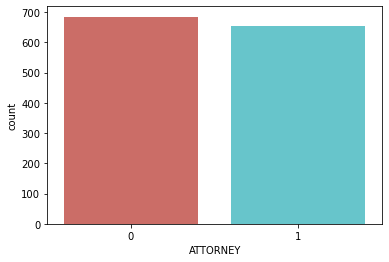

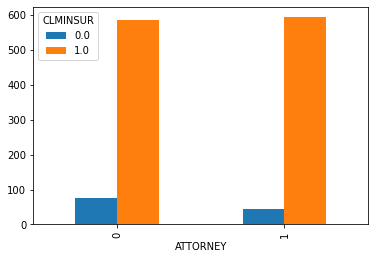

In [9]:
sb.countplot(x="ATTORNEY",data=claimants,palette="hls")
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='SEATBELT'>

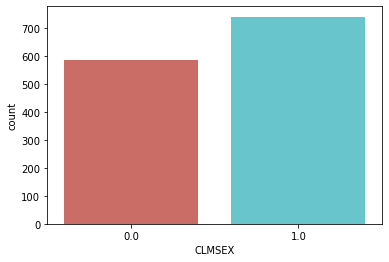

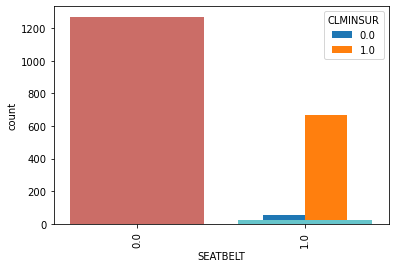

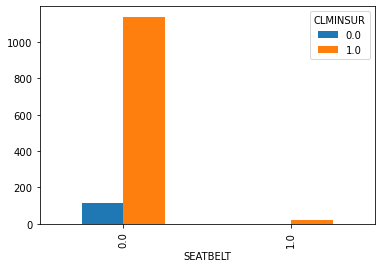

In [10]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='CLMINSUR', ylabel='count'>

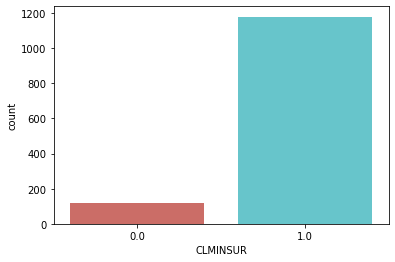

In [11]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")

In [12]:
# Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns


<AxesSubplot:xlabel='CLMINSUR', ylabel='LOSS'>

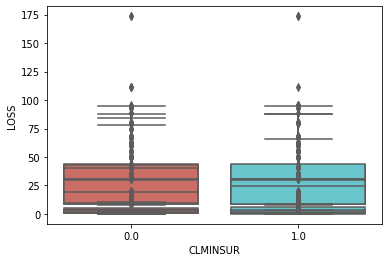

In [13]:
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")


In [14]:
# To get the count of null values in the data 


In [15]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [16]:
claimants.shape # 1340 6 => Before dropping null values


(1340, 6)

In [17]:
# To drop null values ( dropping rows)

In [18]:
claimants.dropna().shape # 1096 6 => After dropping null values


(1096, 6)

In [19]:
# Fill nan values with mode of the categorical column 

In [20]:
claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1


In [21]:
claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1


In [22]:
claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0


In [23]:
claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1



In [24]:
claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4
# Model building 
from sklearn.linear_model import LogisticRegression

In [25]:
claimants.shape
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [26]:
classifier.coef_ # coefficients of features 
classifier.predict_proba (X) # Probability values 


array([[9.99974075e-01, 2.59253820e-05],
       [4.95386951e-01, 5.04613049e-01],
       [4.25082812e-01, 5.74917188e-01],
       ...,
       [2.85349951e-01, 7.14650049e-01],
       [6.86685509e-01, 3.13314491e-01],
       [3.38781941e-01, 6.61218059e-01]])

In [27]:
y_pred = classifier.predict(X)
claimants["y_pred"] = y_pred
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([claimants,y_prob],axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
type(y_pred)
accuracy = sum(Y==y_pred)/claimants.shape[0]
pd.crosstab(y_pred,Y)

[[435 250]
 [147 508]]


ATTORNEY,0,1
row_0,,
0,435,147
1,250,508


In [28]:
##########################################################################
# Loading data which contains categorical data to demonstrate how to 
# create dummy columns 


In [47]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report


In [54]:
salary = pd.read_csv("sal.csv")

salary.head(10)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [55]:
# creating dummy columns for the categorical columns 
salary.columns
sal_dummies = pd.get_dummies(salary[["workclass","occupation","education","maritalstatus","relationship","race","sex","native"]])
# Dropping the columns for which we have created dummies
salary.drop(["workclass","education","maritalstatus","occupation","relationship","race","sex","native"],inplace=True,axis = 1)


In [56]:
# adding the columns to the salary data frame 


In [57]:
salary = pd.concat([salary,sal_dummies],axis=1)


In [58]:
salary["cat"] = 0


In [59]:
salary.loc[salary.Salary==" <=50K","cat"] = 1
salary.Salary.value_counts()
salary.cat.value_counts()
salary.drop(["Salary"],axis=1,inplace=True)


In [60]:
##########################################################################

In [37]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [39]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [40]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [41]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [42]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [43]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [44]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

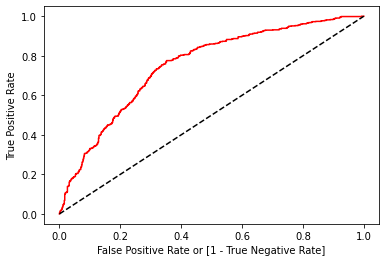

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [46]:
auc

0.7053045077171672